In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
ardi_data = pd.read_csv("Cleaned_1_data.csv")

ardi_data

,YearStart,YearEnd,LocationAbbr,LocationDesc,DataSource,ConditionType,Category,Cause_of_Death,Data_Value_Alt,Effect,ConsumptionPattern,Sex,AgeGroup
0,2015,2019,AL,Alabama,ARDI,Acute,Alcohol-Related Poisonings,Poisoning (not alcohol),10.0,Harmful Effects,Excessive Alcohol Use,Overall,65+
1,2015,2019,AL,Alabama,ARDI,Acute,Alcohol-Related Poisonings,Poisoning (not alcohol),54.0,Harmful Effects,Excessive Alcohol Use,Overall,50-64
2,2015,2019,AL,Alabama,ARDI,Acute,Alcohol-Related Poisonings,Poisoning (not alcohol),82.0,Harmful Effects,Excessive Alcohol Use,Overall,35-49
3,2015,2019,AL,Alabama,ARDI,Acute,Motor Vehicle Traffic Crashes,Motor vehicle traffic crashes,115.0,Harmful Effects,Excessive Alcohol Use,Overall,20-34
4,2015,2019,AL,Alabama,ARDI,Acute,Motor Vehicle Traffic Crashes,Motor vehicle traffic crashes,23.0,Harmful Effects,Excessive Alcohol Use,Overall,0-19
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4122,2015,2019,WY,Wyoming,ARDI,Chronic,100% Alcohol-Attributable,Alcohol abuse,12.0,Harmful Effects,Any Alcohol Use,Overall,50-64
4123,2015,2019,WY,Wyoming,ARDI,Chronic,100% Alcohol-Attributable,Alcoholic liver disease,14.0,Harmful Effects,Any Alcohol Use,Overall,65+
4124,2015,2019,WY,Wyoming,ARDI,Chronic,100% Alcohol-Attributable,Alcoholic liver disease,24.0,Harmful Effects,Any Alcohol Use,Overall,35-49
4125,2015,2019,WY,Wyoming,ARDI,Chronic,100% Alcohol-Attributable,Alcoholic liver disease,43.0,Harmful Effects,Any Alcohol Use,Overall,50-64


In [3]:
unique_cat = ardi_data['LocationDesc'].unique()
print(unique_cat)

['Alabama' 'Alaska' 'Arizona' 'New Hampshire' 'Arkansas' 'California'
 'Colorado' 'Connecticut' 'Delaware' 'District of Columbia' 'Florida'
 'Georgia' 'Hawaii' 'Idaho' 'Illinois' 'Indiana' 'Iowa' 'Kansas'
 'Kentucky' 'Louisiana' 'Maine' 'Maryland' 'Massachusetts' 'Michigan'
 'Minnesota' 'Mississippi' 'Missouri' 'Montana' 'Nebraska' 'Wisconsin'
 'Nevada' 'New Jersey' 'West Virginia' 'New Mexico' 'New York'
 'North Carolina' 'North Dakota' 'Ohio' 'Oklahoma' 'Oregon' 'Pennsylvania'
 'Rhode Island' 'South Carolina' 'South Dakota' 'Tennessee' 'Texas' 'Utah'
 'Vermont' 'Virginia' 'Washington' 'Wyoming']


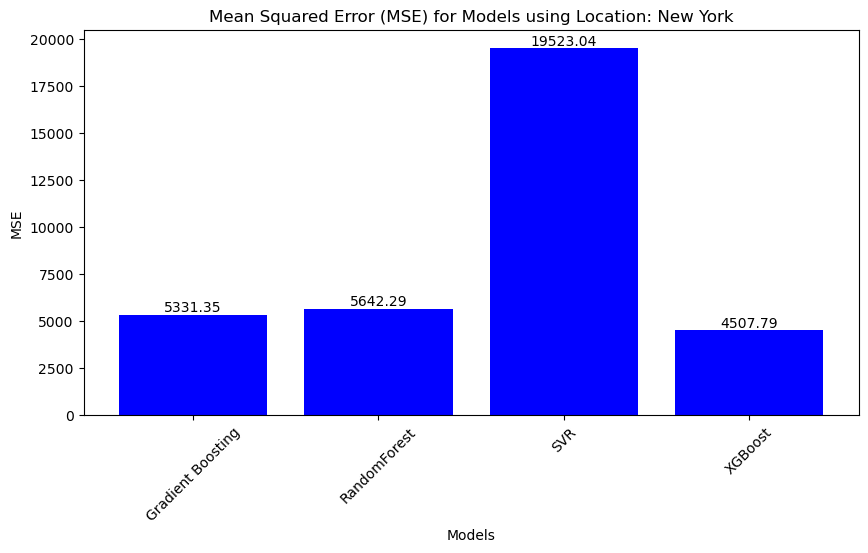

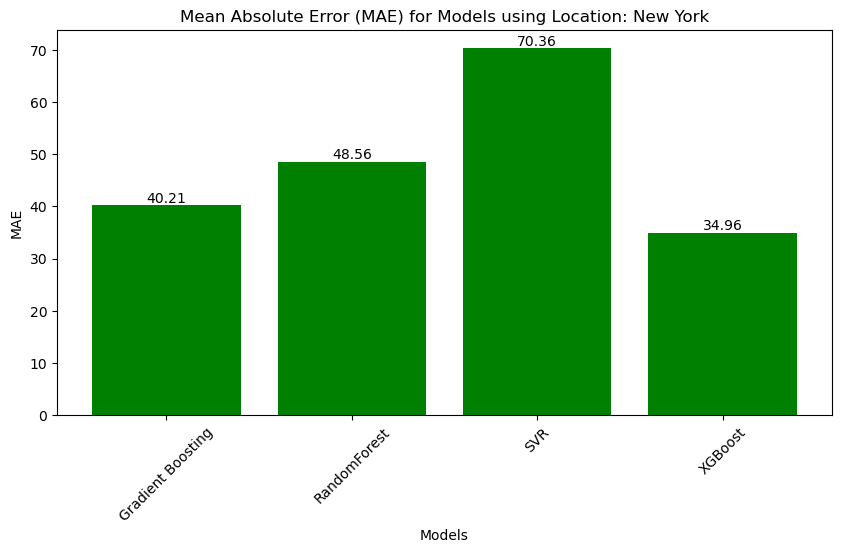

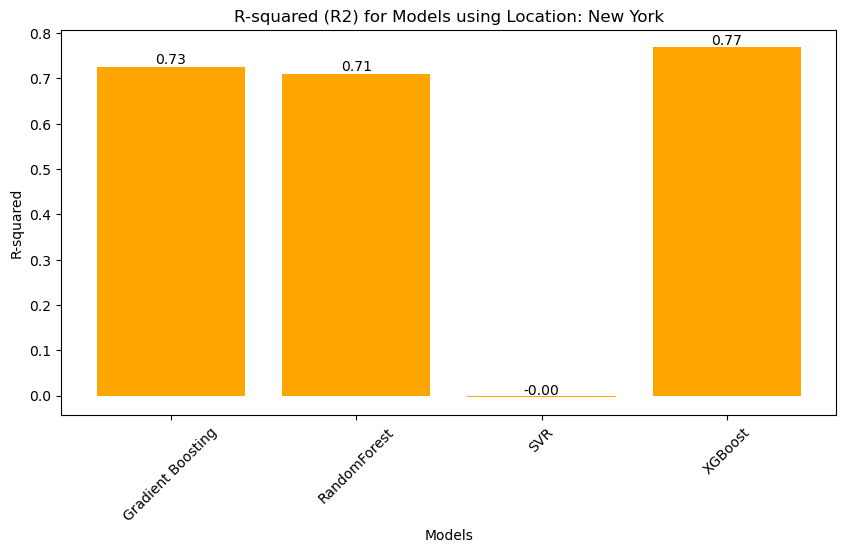

In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

def predict_with_models(ardi_data, location):
    # Encode categorical variables
    label_encoders = {}
    categorical_columns = ['AgeGroup', 'ConsumptionPattern', 'ConditionType', 'Category', 'Cause_of_Death']
    
    for col in categorical_columns:
        le = LabelEncoder()
        ardi_data[col] = le.fit_transform(ardi_data[col])
        label_encoders[col] = le

    # Filter data by location
    filtered_data = ardi_data[ardi_data['LocationDesc'] == location]
    
    # Check if there are enough samples for training and testing
    if len(filtered_data) < 2:
        raise ValueError("Insufficient samples for training and testing.")
    
    # Split data into features and target
    X = filtered_data[['AgeGroup', 'ConsumptionPattern', 'ConditionType', 'Category', 'Cause_of_Death']]
    y = filtered_data['Data_Value_Alt']
    
    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Initialize models
    models = {
        'Gradient Boosting': GradientBoostingRegressor(),
        'RandomForest': RandomForestRegressor(),
        'SVR': SVR(kernel='linear'),
        'XGBoost': XGBRegressor()
    }

    # Make predictions and evaluate each model
    mse_results = {}
    mae_results = {}
    r2_results = {}
    for model_name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        mse = mean_squared_error(y_test, y_pred)
        mae = mean_absolute_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
        mse_results[model_name] = mse
        mae_results[model_name] = mae
        r2_results[model_name] = r2

    # Plot MSE for all models
    plt.figure(figsize=(10, 5))
    bars = plt.bar(mse_results.keys(), mse_results.values(), color='blue')
    plt.title(f'Mean Squared Error (MSE) for Models using Location: {location}')
    plt.xlabel('Models')
    plt.ylabel('MSE')
    plt.xticks(rotation=45)
    
    # Add annotations to the bars
    for bar, mse in zip(bars, mse_results.values()):
        plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{mse:.2f}', ha='center', va='bottom')

    plt.show()

    # Plot MAE for all models
    plt.figure(figsize=(10, 5))
    bars = plt.bar(mae_results.keys(), mae_results.values(), color='green')
    plt.title(f'Mean Absolute Error (MAE) for Models using Location: {location}')
    plt.xlabel('Models')
    plt.ylabel('MAE')
    plt.xticks(rotation=45)
    
    # Add annotations to the bars
    for bar, mae in zip(bars, mae_results.values()):
        plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{mae:.2f}', ha='center', va='bottom')

    plt.show()

    # Plot R-squared for all models
    plt.figure(figsize=(10, 5))
    bars = plt.bar(r2_results.keys(), r2_results.values(), color='orange')
    plt.title(f'R-squared (R2) for Models using Location: {location}')
    plt.xlabel('Models')
    plt.ylabel('R-squared')
    plt.xticks(rotation=45)
    
    # Add annotations to the bars
    for bar, r2 in zip(bars, r2_results.values()):
        plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{r2:.2f}', ha='center', va='bottom')

    plt.show()

# Load your ARDI data
ardi_data = pd.read_csv("Cleaned_1_data.csv")

# Specify the location for filtering
location = 'New York'

# Perform prediction with models for the specified location
predict_with_models(ardi_data, location)


In [4]:
# Based on location linear

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import LabelEncoder


# Encode categorical variables
label_encoders = {}
categorical_columns = [ 'AgeGroup','ConsumptionPattern', 'ConditionType', 'Category','Cause_of_Death']  # List of categorical columns to encode

for col in categorical_columns:
    le = LabelEncoder()
    ardi_data[col] = le.fit_transform(ardi_data[col])
    label_encoders[col] = le

# Function to make predictions based on LocationDesc using Linear Regression
def predict_by_location_linear(location):
    df_filtered = ardi_data[ardi_data['LocationDesc'] == location]
    
    # Check if there are enough samples for splitting
    if len(df_filtered) < 2:
        raise ValueError("Insufficient samples for training and testing.")
    
    X = df_filtered[['AgeGroup','ConsumptionPattern', 'ConditionType', 'Category','Cause_of_Death']]  # Features
    y = df_filtered['Data_Value_Alt']  # Target
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    
    model = LinearRegression()  # Using Linear Regression
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
       
    
    linear_mse = mean_squared_error(y_test, y_pred)
    linear_mae = mean_absolute_error(y_test, y_pred)
    linear_r2 = r2_score(y_test, y_pred)
    
    return y_pred, linear_mse, linear_mae, linear_r2

# Example
# Example prediction using Linear Regression based on LocationDesc
location = 'New York' 

prediction, linear_mse, linear_mae, linear_r2 = predict_by_location_linear(location)
print(f"Linear Regression Predicted values for '{location}':", prediction)
print("Mean Squared Error (MSE):", linear_mse)
print("Mean Absolute Error (MAE):", linear_mae)
print("R-squared (R2):", linear_r2)


Linear Regression Predicted values for 'New York': [ 83.14402951  43.55277233  25.17781456  31.98447344  94.84675195
  87.618307   109.25307563 108.32564617 112.93766404  53.74646134
 101.51898728  66.33438943  41.20850919 118.47711137  79.01008196
 155.06389218  53.26839101  74.81150774 102.32550581 172.18569885
  83.00628912  86.78639412 110.08830534  75.8593003   64.00477702
  91.56154673  73.78225338 179.63356281  34.82031953]
Mean Squared Error (MSE): 16577.984247624892
Mean Absolute Error (MAE): 73.62710898934594
R-squared (R2): 0.1473438195430068


In [5]:
# based on location Xgboost

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import LabelEncoder


# Encode categorical variables
label_encoders = {}
categorical_columns = [ 'AgeGroup','ConsumptionPattern', 'ConditionType', 'Category','Cause_of_Death']  # List of categorical columns to encode

for col in categorical_columns:
    le = LabelEncoder()
    ardi_data[col] = le.fit_transform(ardi_data[col])
    label_encoders[col] = le

# Function to make predictions based on LocationDesc using Linear Regression
def predict_by_location_xgboost(location):
    df_filtered = ardi_data[ardi_data['LocationDesc'] == location]
    
    # Check if there are enough samples for splitting
    if len(df_filtered) < 2:
        raise ValueError("Insufficient samples for training and testing.")
    
    X = df_filtered[[ 'AgeGroup','ConsumptionPattern', 'ConditionType', 'Category','Cause_of_Death']]  # Features
    y = df_filtered['Data_Value_Alt']  # Target
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


       
    model = XGBRegressor()  # Using XGBoost for regression
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    xgboost_mse = mean_squared_error(y_test, y_pred)
    xgboost_mae = mean_absolute_error(y_test, y_pred)
    xgboost_r2 = r2_score(y_test, y_pred)
    
    return y_pred, xgboost_mse, xgboost_mae, xgboost_r2

# Example
# Example prediction using Linear Regression based on LocationDesc
location = 'New York' 

prediction, xgboost_mse, xgboost_mae, xgboost_r2 = predict_by_location_xgboost(location)
print(f"XGboost Predicted values for '{location}':", prediction)
print("Mean Squared Error (MSE):", xgboost_mse)
print("Mean Absolute Error (MAE):", xgboost_mae)
print("R-squared (R2):", xgboost_r2)


XGboost Predicted values for 'New York': [ 37.47332    97.65922    45.74115    92.38704    35.190865   73.39673
  55.999638  117.973785  230.52989    25.219406   38.132687   85.16307
 109.46677   507.0275     50.943836    2.9681745  66.70113    40.08201
  46.433113   90.89232    69.09393     9.765437   16.981836   50.646645
  53.92381    87.05781    80.943695   93.0228     15.547451 ]
Mean Squared Error (MSE): 4507.791288281608
Mean Absolute Error (MAE): 34.962664456203065
R-squared (R2): 0.7681505758027143


In [6]:
# based on location SVR

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import LabelEncoder

# # Load the dataset from ardi_data
# df = pd.read_csv('ardi_data.csv')

# Encode categorical variables
label_encoders = {}
categorical_columns =[ 'AgeGroup','ConsumptionPattern', 'ConditionType', 'Category','Cause_of_Death']  # List of categorical columns to encode

for col in categorical_columns:
    le = LabelEncoder()
    ardi_data[col] = le.fit_transform(ardi_data[col])
    label_encoders[col] = le

# Function to make predictions based on LocationDesc using SVR
def predict_by_location_svr(location):
    df_filtered = ardi_data[ardi_data['LocationDesc'] == location]
    
    # Check if there are enough samples for splitting
    if len(df_filtered) < 2:
        raise ValueError("Insufficient samples for training and testing.")
    
    X = df_filtered[[ 'AgeGroup','ConsumptionPattern', 'ConditionType', 'Category','Cause_of_Death']]  # Features
    y = df_filtered['Data_Value_Alt']  # Target
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    
    # model = SVR(kernel='linear')  # Using a linear kernel for SVR
    # model.fit(X_train, y_train)
    # y_pred = model.predict(X_test)
    model = SVR(kernel='rbf')  # Using RBF kernel for SVR
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)
    
    svr_mse = mean_squared_error(y_test, y_pred)
    svr_mae = mean_absolute_error(y_test, y_pred)
    svr_r2 = r2_score(y_test, y_pred)
    
    return y_pred, svr_mse, svr_mae, svr_r2

# Example prediction using SVR based on LocationDesc
location = 'New York' 

prediction, svr_mse, svr_mae, svr_r2 = predict_by_location_svr(location)
print(f"SVR Predicted values for '{location}':", prediction)
print("Mean Squared Error (MSE):", svr_mse)
print("Mean Absolute Error (MAE):", svr_mae)
print("R-squared (R2):", svr_r2)


SVR Predicted values for 'New York': [53.39754377 50.46974614 50.67395797 51.41044528 51.32009248 50.65811603
 50.73062556 50.66785783 50.68696765 50.54897978 52.61645215 50.68564364
 51.39179202 50.76693873 55.07253555 51.32301341 51.3977418  54.93490339
 52.42713955 51.21450583 50.65405538 53.14674877 54.67846857 53.87060315
 53.98864661 53.66070281 50.6826064  51.21418258 51.43469767]
Mean Squared Error (MSE): 21514.43805029513
Mean Absolute Error (MAE): 72.74477241465611
R-squared (R2): -0.10655302228746111


In [13]:
# location based

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import LabelEncoder

# # Load the dataset from ardi_data
# df = pd.read_csv('ardi_data.csv')

# Encode categorical variables
label_encoders = {}
categorical_columns = [ 'AgeGroup','ConsumptionPattern', 'ConditionType', 'Category','Cause_of_Death']  # List of categorical columns to encode

for col in categorical_columns:
    le = LabelEncoder()
    ardi_data[col] = le.fit_transform(ardi_data[col])
    label_encoders[col] = le

# Function to make predictions based on LocationDesc using Gradient Boosting
def predict_by_location_gb(location):
    df_filtered = ardi_data[ardi_data['LocationDesc'] == location]
    
    # Check if there are enough samples for splitting
    if len(df_filtered) < 2:
        raise ValueError("Insufficient samples for training and testing.")
    
    X = df_filtered[[ 'AgeGroup','ConsumptionPattern', 'ConditionType', 'Category','Cause_of_Death']]  # Features
    y = df_filtered['Data_Value_Alt']  # Target
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    
    model = GradientBoostingRegressor()  # Using Gradient Boosting for regression
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    gb_mse = mean_squared_error(y_test, y_pred)
    gb_mae = mean_absolute_error(y_test, y_pred)
    gb_r2 = r2_score(y_test, y_pred)
    
    # mse = mean_squared_error(y_test, y_pred)
    # mae = mean_absolute_error(y_test, y_pred)
    # r2 = r2_score(y_test, y_pred)
    
    
    
    return y_pred, gb_mse, gb_mae, gb_r2

# Example prediction using Gradient Boosting based on LocationDesc
location = 'New York' 


prediction,gb_mse, gb_mae, gb_r2 = predict_by_location_gb(location)
print(f"Gradient Boosting Predicted values for '{location}':", prediction)
print("Mean Squared Error (MSE):", gb_mse)
print("Mean Absolute Error (MAE):", gb_mae)
print("R-squared (R2):", gb_r2)




Gradient Boosting Predicted values for 'New York': [ 30.91823146  92.60149268  26.36427251 120.72356004  98.23506849
  90.92373886 132.06197151  89.80053084 168.20633603  29.46355645
  45.60116549  65.42322693  93.13472957 397.86059957  48.93576886
  58.52811061  56.36494847  15.0129262   54.95919803 191.04488599
  94.58700138  20.72171647  22.24548884  40.81859555  98.36736492
  80.52306964  65.42322693 191.04488599  19.59730048]
Mean Squared Error (MSE): 5331.34516218195
Mean Absolute Error (MAE): 40.20796409616807
R-squared (R2): 0.7257926938050262


In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import LabelEncoder

# Encode categorical variables
label_encoders = {}
categorical_columns = [ 'AgeGroup','ConsumptionPattern', 'ConditionType', 'Category','Cause_of_Death'] # List of categorical columns to encode

for col in categorical_columns:
    le = LabelEncoder()
    ardi_data[col] = le.fit_transform(ardi_data[col])
    label_encoders[col] = le

# Function to make predictions based on LocationDesc using Random Forest
def predict_by_location_random_forest(location):
    df_filtered = ardi_data[ardi_data['LocationDesc'] == location]
    
    # Check if there are enough samples for splitting
    if len(df_filtered) < 2:
        raise ValueError("Insufficient samples for training and testing.")
    
    X = df_filtered[[ 'AgeGroup','ConsumptionPattern', 'ConditionType', 'Category','Cause_of_Death']]  # Features
    y = df_filtered['Data_Value_Alt']  # Target
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    model = RandomForestRegressor()  # Using RandomForestRegressor for regression
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Calculate evaluation metrics
    rf_mse = mean_squared_error(y_test, y_pred)
    rf_mae = mean_absolute_error(y_test, y_pred)
    rf_r2 = r2_score(y_test, y_pred)
    
    return y_pred, rf_mse, rf_mae, rf_r2

# Example prediction using Random Forest based on LocationDesc
location = 'New York' 

prediction, rf_mse, rf_mae, rf_r2 = predict_by_location_random_forest(location)
print(f"Random Forest Predicted values for '{location}':", prediction)
print("Mean Squared Error (MSE):", rf_mse)
print("Mean Absolute Error (MAE):", rf_mae)
print("R-squared (R2):", rf_r2)


Random Forest Predicted values for 'New York': [ 46.41  71.34  57.8   88.95  77.77  76.97  88.31  85.49 165.49  26.
  56.32  79.94  96.44 448.61  60.72  95.09  87.16  58.26  74.74 218.07
  79.04  46.7   83.62  47.25 108.95  65.27  77.96 206.72  48.76]
Mean Squared Error (MSE): 4456.941093103448
Mean Absolute Error (MAE): 45.61620689655173
R-squared (R2): 0.7707659560895133


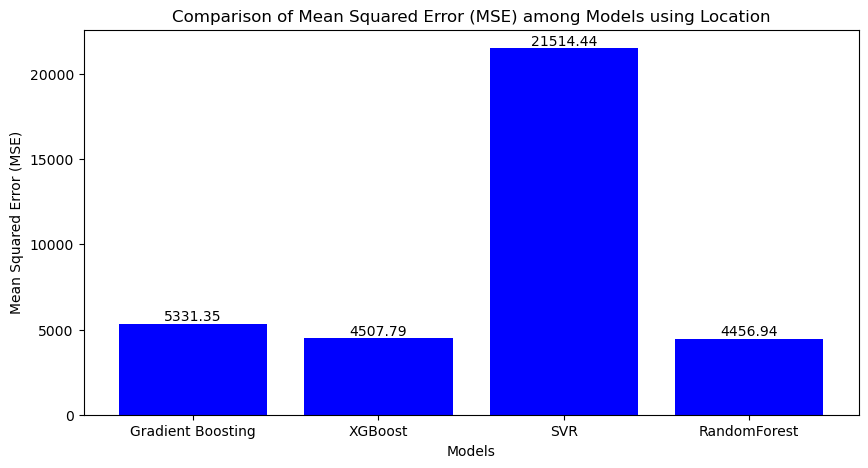

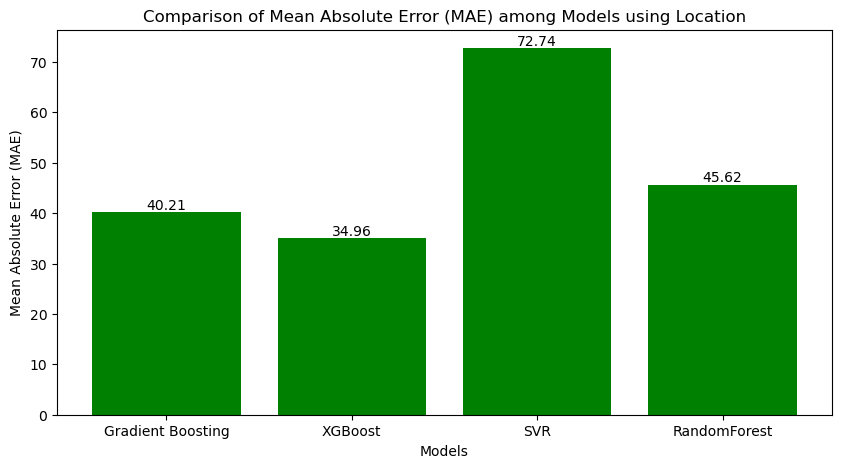

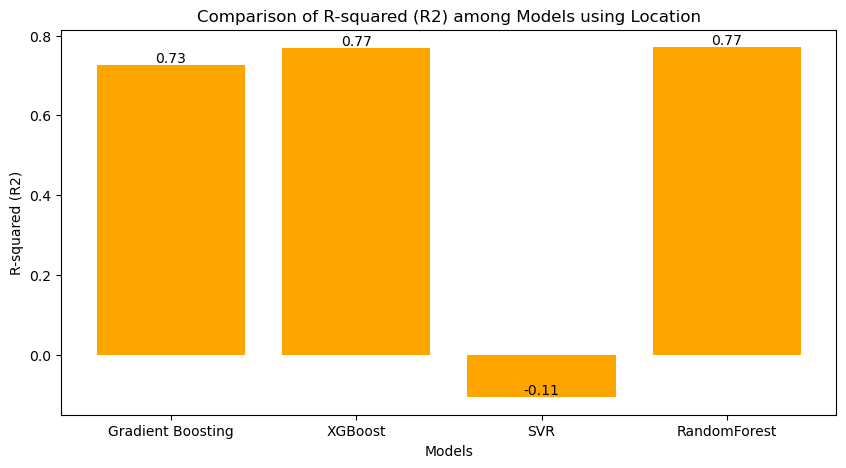

In [14]:
import matplotlib.pyplot as plt

# Create a list of model names and their respective metrics
models = ['Gradient Boosting', 'XGBoost', 'SVR', 'RandomForest']
mse_scores = [gb_mse, xgboost_mse, svr_mse, rf_mse]
mae_scores = [gb_mae, xgboost_mae, svr_mae,rf_mae]
r2_scores = [gb_r2, xgboost_r2, svr_r2,rf_r2]

# Plot Mean Squared Error (MSE)
plt.figure(figsize=(10, 5))
bars = plt.bar(models, mse_scores, color='blue')
plt.xlabel('Models')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Comparison of Mean Squared Error (MSE) among Models using Location')

# Add annotations to the bars
for bar, mse in zip(bars, mse_scores):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{mse:.2f}', ha='center', va='bottom')

plt.show()


# Plot Mean Absolute Error (MAE)
plt.figure(figsize=(10, 5))
bars = plt.bar(models, mae_scores, color='green')
plt.xlabel('Models')
plt.ylabel('Mean Absolute Error (MAE)')
plt.title('Comparison of Mean Absolute Error (MAE) among Models using Location')
# Add annotations to the bars
for bar, mae in zip(bars, mae_scores):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{mae:.2f}', ha='center', va='bottom')

plt.show()

# Plot R-squared (R2)
plt.figure(figsize=(10, 5))
bars = plt.bar(models, r2_scores, color='orange')
plt.xlabel('Models')
plt.ylabel('R-squared (R2)')
plt.title('Comparison of R-squared (R2) among Models using Location')
# Add annotations to the bars
for bar, r2 in zip(bars, r2_scores):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{r2:.2f}', ha='center', va='bottom')

plt.show()

